# `plot_brain_nuclei.ipynb`

Plots *E. muscae* nuclei within a fly brain stained by nc82, for Figure 5B

In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv
import scipy.io
import pandas as pd
import time
import glob
from PIL import Image
import os

## read in positions of nuclei

In [2]:
df_nuclei = pd.read_csv('../../Data/Data by figure/Fig 5 + Supp/brain_nc82_and_fungal_nuclei/brain1_nuclei.csv', index_col=0)
df_nuclei.head()

Label  Area  Mean  Min  Max  \
                                                                             
1  Brain1_20x_stack.czi:c:2/3 z:26/26 - Brain1_20...   0.0   105  105  105   
2  Brain1_20x_stack.czi:c:2/3 z:26/26 - Brain1_20...   0.0   109  109  109   
3  Brain1_20x_stack.czi:c:2/3 z:26/26 - Brain1_20...   0.0    65   65   65   
4  Brain1_20x_stack.czi:c:2/3 z:26/26 - Brain1_20...   0.0    28   28   28   
5  Brain1_20x_stack.czi:c:2/3 z:26/26 - Brain1_20...   0.0    41   41   41   

         X        Y  IntDen  Skew  Kurt  RawIntDen  Ch  Slice  
                                                               
1  325.687  176.521   6.320   NaN   NaN        105   2      1  
2  368.691  182.351   6.561   NaN   NaN        109   2      1  
3  366.544  185.572   3.912   NaN   NaN         65   2      1  
4  360.639  180.741   1.685   NaN   NaN         28   2      1  
5  353.661  182.888   2.468   NaN   NaN         41   2      1

Set scaling factor:

In [3]:
scalef = 2048/502.45 ### px / um
nuc_XY = df_nuclei[['X', 'Y']].values.astype(float) * scalef
nuc_z = df_nuclei['Slice'].values.astype(float) - 1
nuc_XY_transformed = nuc_XY.copy()

## read in brain nc82 image

In [4]:
filepath = '../../Data/Data by figure/Fig 5 + Supp/brain_nc82_and_fungal_nuclei/brain1_nc82.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)
    
imMat = arrays['imMat'].T
imMat.shape

(2048, 2048, 24)

## plot single z slice

Plot single slice of stack with a 100 $\mu$m scalebar 

In [5]:
z_frame_of_interest = 10
cur_z_stack_nucs = nuc_XY_transformed[np.where(nuc_z == z_frame_of_interest)]

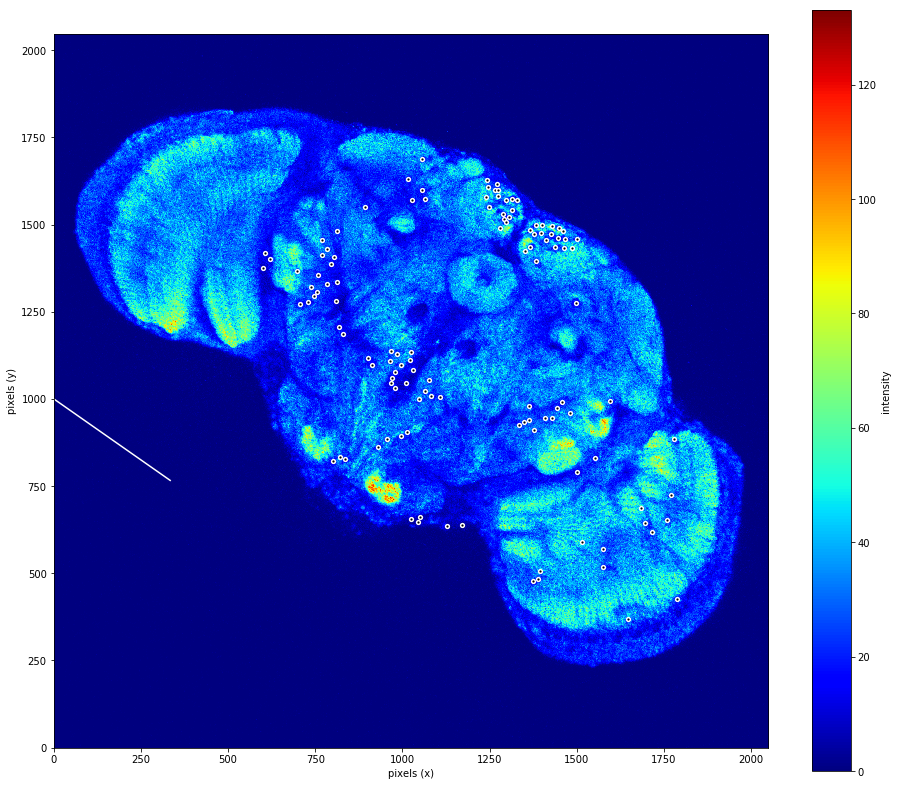

In [6]:
scale_bar_um = 100

%matplotlib inline

fig, ax = plt.subplots(figsize=(16,14))
sc = plt.imshow(imMat[:, :, z_frame_of_interest], 
                cmap='jet', 
                interpolation='nearest')
plt.scatter(cur_z_stack_nucs[:, 0], 
            cur_z_stack_nucs[:, 1], 
            c='k', edgecolors='w', linewidths=1.5, s=14)

scale_len_px = scale_bar_um*scalef
scale_l = (0, 1000, 0)
scale_angle = 35
scale_r = (scale_l[0] + scale_len_px*np.cos(np.radians(scale_angle)),
           scale_l[1] - scale_len_px*np.sin(np.radians(scale_angle)))
plt.plot((scale_l[0], scale_r[0]), (scale_l[1], scale_r[1]), c='w')

ax.invert_yaxis()
plt.colorbar(sc, label='intensity')
plt.xlabel('pixels (x)')
plt.ylabel('pixels (y)')
plt.show()

## 3-d image

In [7]:
# colormap for nuclei
nZ = 24
cm_name = 'plasma'
cmap = plt.cm.get_cmap(cm_name, nZ)
z_colors = np.array([cmap(z/nZ) for z in nuc_z])

# colormap for nc82
jet_ipv = ipv.transferfunction.matplotlib_transfer_function('jet')
greys = ipv.transferfunction.matplotlib_transfer_function('Greys_r')

In [8]:
fig = ipv.figure()
v = ipv.volshow(np.swapaxes(imMat, 0, 1).T, 
                tf=ipv.transferfunction.matplotlib_transfer_function('Greys'),
           )

show_nuclei = 1
if show_nuclei:
    s = ipv.scatter(nuc_XY_transformed[:, 0], nuc_XY_transformed[:, 1], nuc_z,
                color=z_colors, 
                size=1.125, 
                marker='sphere',
                cast_shadow=False,
                receive_shadow=False)

dz = 50
ipv.zlim(0-dz, 24+dz)

# scale bar
show_scale_bar = 0
scale_len_um = 100
if show_scale_bar:
    scale_len_px = scale_len_um*scalef
    scale_l = (-100, 1200)
    scale_angle = 35
    scale_r = (scale_l[0] + scale_len_px*np.cos(np.radians(scale_angle)),
               scale_l[1] - scale_len_px*np.sin(np.radians(scale_angle)))
    ipv.plot((scale_l[0], scale_r[0]), 
             (scale_l[1], scale_r[1]),
             (nZ/2, nZ/2), color='white', 
             lw=12, size=300)


ipv.pylab.style.box_off()
ipv.pylab.style.axes_off()

ipv.pylab.style.set_style_dark()
ipv.view(0,0,0.9)

#ipv.animation_control(s)
#ipv.anglez = np.radians(30)
ipv.show()

C:\Users\dB\Anaconda3\envs\classifier\lib\site-packages\ipyvolume\widgets.py:241: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
C:\Users\dB\Anaconda3\envs\classifier\lib\site-packages\ipyvolume\utils.py:208: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2]) / 2
C:\Users\dB\Anaconda3\envs\classifier\lib\site-packages\ipyvolume\serialize.py:92: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0] ** 2 + gradient[1] ** 2 + 

^ Use the sliders to set the opacity to 100, brightness to 3.16! Also, use the gear icon and select UHD to get everything within the frame

## set anterior, posterior view

In [9]:
up_pos = [np.radians(x) for x in (0, 0, -35)]
down_pos = [np.radians(x) for x in (180, -7, -155)]

Running the following cell will lock the camera angle in the figure above to obtain the Anterior view:

In [10]:
time.sleep(1)
fig.camera_center = [0,0,0]
fig.camera.rotation = (*up_pos, 'XYZ')

Posterior view:

In [11]:
ipv.view(-180, 0, 0.9)

(-180, 0, 0.9)

## create animated gif

The following cells use manually-obtained camera positions (in radians) to rotate the 3d figure above and save 

In [12]:
save_gif = False

In [13]:
[np.degrees(x) for x in fig.camera.rotation[:-1]]

[-3.508354649267438e-15, 0.0, -34.99999999999999]

In [14]:
camera_rotation_radians = np.array(
    [[0.0, 0.0, -0.6108652381980153], # 0
    [-0.5913337396890266, -0.6729686135893567, -0.8539188300991596], #45
    [-1.5710222528920685, -0.950799406972876, -1.5479345640658022], #90
    [-2.6293724907808373, -0.6247471805367574, -2.3433157741075332], #135
    [3.1153382751435075, -0.11376253151422033, -2.5483652828446672], #180
    [2.6029363632844973, 0.5919512719139468, -2.421191784311031], #225
    [1.5883552753708317, 0.9862771843379121, -1.6622850637214583], #270
    [0.5174884788205342, 0.6654856151664129, -0.8176739466403306], #315
    [0.03647016140374925, 0.0894335782604786, -0.619837678250177]]) #360

In [15]:
def set_view(figure, framenr, fraction):
    ipv.view(fraction*360, 
             0,
             distance=1.75)
    s.size = 1.125

In [16]:
if save_gif:
    gif_stack_dir = ipv.movie('brain_wave.gif', set_view, fps=20, frames=40)
    
    frames = []
    imgs = glob.glob(os.path.join(gif_stack_dir, '*.png'))
    for i in imgs:
        new_frame = Image.open(i)
        frames.append(new_frame)
    
    frames[0].save('brain_wave.gif', format='GIF', append_images=frames[1:], save_all=True, duration=5, loop=0)

In [17]:
# more camera positions
#-33.624090308686185, -30.851892143003898, -43.14153110232325 # left up corner 
#-87.46682441184124, -48.680913624665465, -79.66446075385365    # side left
#-140.82347217475925, -41.03215340651006, -117.30105611033083 # left back corner
#178.1719271897109, -11.051429151380411, -136.99693745602835 # back
#140.88738094476702, 30.686096228315424, -129.89904728556854 # right back corner
#90.23546356761746, 52.95530041085488, -93.07028707237562    # side right
#41.88185617629537, 45.15301539291088, -55.746880610090734  # right up corner
#-1.8808989822729374, 4.938865365115951, -33.90253233081739  # front

## colorbar for depth

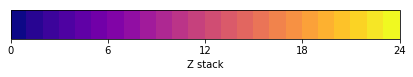

In [18]:
fig_colorbar = plt.figure()
ax = fig_colorbar.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=cmap,
                               norm=mpl.colors.Normalize(0, nZ, nZ),  # vmax and vmin
                               #extend='both',
                               label='Z stack',
                               ticks=nZ*np.linspace(0, 1, 5))
#plt.savefig('ant_post_colorbar.png', dpi=300, bbox_inches='tight')
#plt.savefig('ant_post_colorbar.pdf', bbox_inches='tight')
plt.show()